In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
stock_symbol = "ZEEL.NS"

In [3]:
df = yf.download(tickers=stock_symbol,period='1y', interval='1D')

[*********************100%***********************]  1 of 1 completed


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-14,244.899994,262.799988,244.100006,259.200012,256.408417,27764946
2022-03-15,260.000000,263.950012,252.600006,253.949997,251.214935,15453515
2022-03-16,259.000000,259.000000,253.000000,254.149994,251.412781,8512767
2022-03-17,259.799988,261.750000,255.800003,258.799988,256.012695,9120713
2022-03-21,258.950012,263.299988,256.100006,256.799988,254.034225,8909916


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-08,198.100006,201.500000,195.350006,196.649994,196.649994,9528342
2023-03-09,196.550003,197.850006,192.399994,193.800003,193.800003,4136612
2023-03-10,192.000000,195.399994,190.399994,193.600006,193.600006,2891305
2023-03-13,193.699997,194.449997,186.399994,188.300003,188.300003,4321616
2023-03-14,187.199997,193.899994,187.100006,192.449997,192.449997,6509766


In [7]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-14,244.899994,262.799988,244.100006,259.200012,256.408417,27764946
1,2022-03-15,260.000000,263.950012,252.600006,253.949997,251.214935,15453515
2,2022-03-16,259.000000,259.000000,253.000000,254.149994,251.412781,8512767
3,2022-03-17,259.799988,261.750000,255.800003,258.799988,256.012695,9120713
4,2022-03-21,258.950012,263.299988,256.100006,256.799988,254.034225,8909916


In [8]:
clo = df[['Close']]

<Axes: >

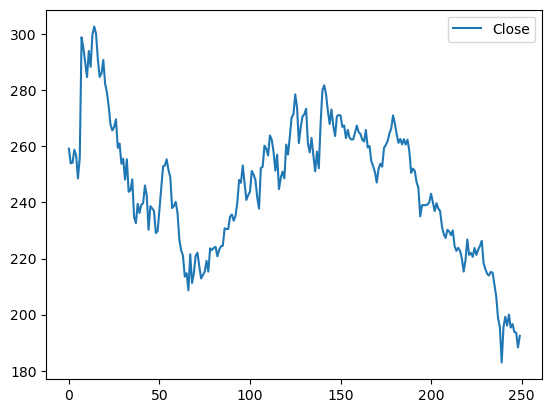

In [9]:
clo.plot()

In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-14,244.899994,262.799988,244.100006,259.200012,256.408417,27764946
1,2022-03-15,260.000000,263.950012,252.600006,253.949997,251.214935,15453515
2,2022-03-16,259.000000,259.000000,253.000000,254.149994,251.412781,8512767
3,2022-03-17,259.799988,261.750000,255.800003,258.799988,256.012695,9120713
4,2022-03-21,258.950012,263.299988,256.100006,256.799988,254.034225,8909916
...,...,...,...,...,...,...,...
245,2023-03-08,198.100006,201.500000,195.350006,196.649994,196.649994,9528342
246,2023-03-09,196.550003,197.850006,192.399994,193.800003,193.800003,4136612
247,2023-03-10,192.000000,195.399994,190.399994,193.600006,193.600006,2891305
248,2023-03-13,193.699997,194.449997,186.399994,188.300003,188.300003,4321616


In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
245    240.230501
246    239.494501
247    238.793501
248    237.969001
249    237.181501
Name: Close, Length: 250, dtype: float64

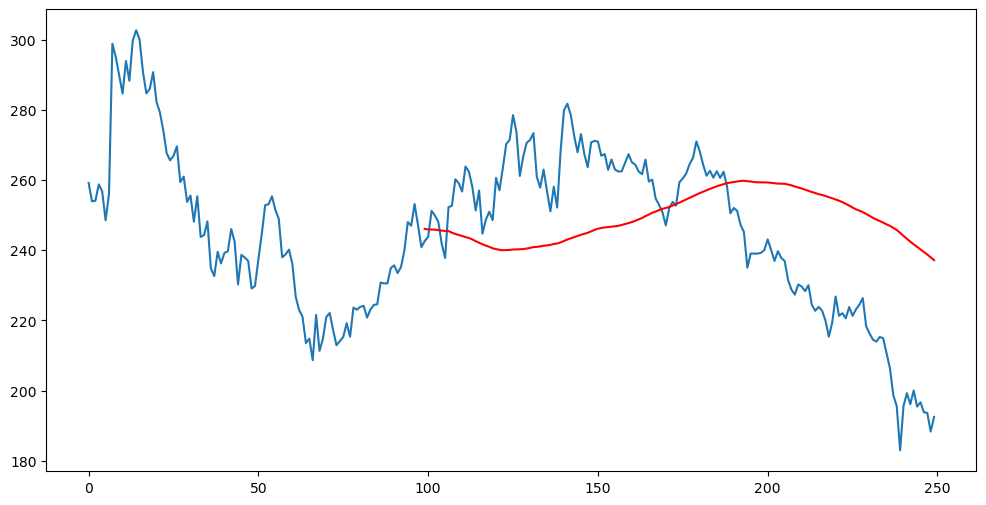

In [12]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
245    242.325251
246    242.104751
247    241.888001
248    241.684001
249    241.497251
Name: Close, Length: 250, dtype: float64

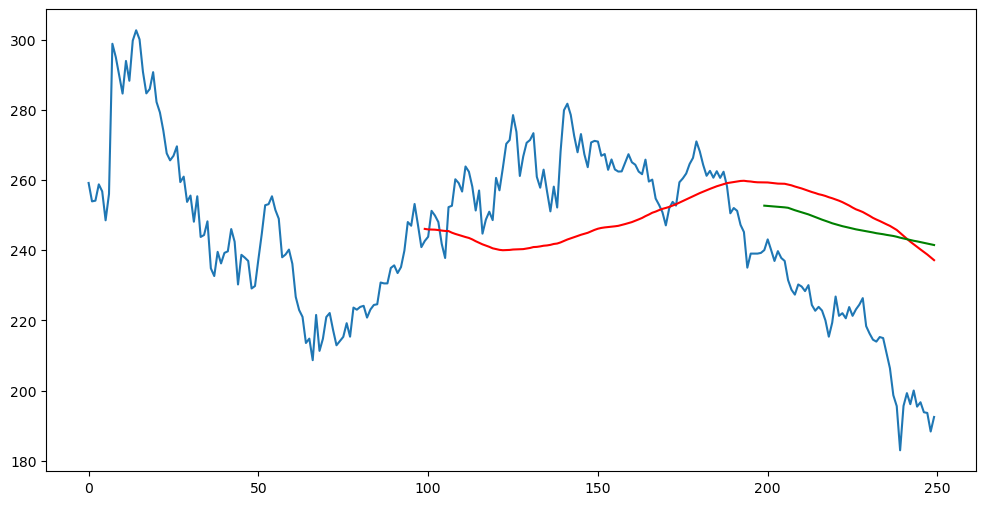

In [14]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [15]:
df.shape

(250, 7)

In [16]:
#split data into training and testing
data_training =pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(175, 1)
(75, 1)


In [17]:
data_training.head()

,Close
0,259.200012
1,253.949997
2,254.149994
3,258.799988
4,256.799988


In [18]:
data_testing.head()

,Close
175,260.500000
176,261.899994
177,264.600006
178,266.350006
179,271.049988


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.53719463],
       [0.48140276],
       [0.48352813],
       [0.53294358],
       [0.51168959],
       [0.42401707],
       [0.50371935],
       [0.95908602],
       [0.91870358],
       [0.86344309],
       [0.80818293],
       [0.90701382],
       [0.84697138],
       [0.96865024],
       [1.        ],
       [0.97236976],
       [0.87407008],
       [0.80871415],
       [0.82199789],
       [0.87300732],
       [0.78267789],
       [0.75079691],
       [0.69606797],
       [0.62699252],
       [0.60573854],
       [0.61955382],
       [0.6482465 ],
       [0.53985138],
       [0.55632309],
       [0.47980878],
       [0.4989374 ],
       [0.41976618],
       [0.49681187],
       [0.37353886],
       [0.37938374],
       [0.42082894],
       [0.27842732],
       [0.2550478 ],
       [0.32837415],
       [0.29330504],
       [0.32518602],
       [0.32996813],
       [0.39744959],
       [0.35919236],
       [0.22954309],
       [0.31934114],
       [0.31083951],
       [0.300

In [21]:
data_training_array.shape

(175, 1)

In [22]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train= np.array(x_train), np.array(y_train)

In [23]:
# ML model Main phase
#from keras.layers import dense, Dropout , LSTM
#from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, LSTM

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu',return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu',return_sequences = True)) 
model.add(Dropout(0.4))

model.add(LSTM(units = 80, activation = 'relu')) 
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 80)                5

In [26]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
3/3 [==============================] - 19s 291ms/step - loss: 0.2937
Epoch 2/50
3/3 [==============================] - 1s 300ms/step - loss: 0.2080
Epoch 3/50
3/3 [==============================] - 1s 280ms/step - loss: 0.0694
Epoch 4/50
3/3 [==============================] - 1s 290ms/step - loss: 0.0514
Epoch 5/50
3/3 [==============================] - 1s 294ms/step - loss: 0.0268
Epoch 6/50
3/3 [==============================] - 1s 256ms/step - loss: 0.0304
Epoch 7/50
3/3 [==============================] - 1s 264ms/step - loss: 0.0366
Epoch 8/50
3/3 [==============================] - 1s 290ms/step - loss: 0.0252
Epoch 9/50
3/3 [==============================] - 1s 305ms/step - loss: 0.0251
Epoch 10/50
3/3 [==============================] - 1s 255ms/step - loss: 0.0198
Epoch 11/50
3/3 [==============================] - 1s 277ms/step - loss: 0.0194
Epoch 12/50
3/3 [==============================] - 1s 267ms/step - loss: 0.0178
Epoch 13/50
3/3 [==============================]

In [27]:
model.save('Keras_model.h5')


In [28]:
data_testing.head()

,Close
175,260.500000
176,261.899994
177,264.600006
178,266.350006
179,271.049988


In [29]:
data_testing.tail(100)

,Close
175,260.500000
176,261.899994
177,264.600006
178,266.350006
179,271.049988
...,...
245,196.649994
246,193.800003
247,193.600006
248,188.300003


In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\praja\AppData\Local\Temp\ipykernel_10428\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [32]:
final_df.head()

,Close
0,215.300003
1,219.199997
2,215.350006
3,223.649994
4,223.050003


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.32726362],
       [0.36671728],
       [0.32776947],
       [0.41173496],
       [0.40566525],
       [0.41375835],
       [0.41679313],
       [0.38290349],
       [0.4061711 ],
       [0.41932221],
       [0.4213456 ],
       [0.48406687],
       [0.48153779],
       [0.48153779],
       [0.52604962],
       [0.53363687],
       [0.51138096],
       [0.5285787 ],
       [0.57612547],
       [0.65857372],
       [0.64795153],
       [0.7106728 ],
       [0.64997477],
       [0.5862418 ],
       [0.6039454 ],
       [0.61608513],
       [0.69094597],
       [0.67728885],
       [0.65857372],
       [0.5953466 ],
       [0.55488125],
       [0.70156816],
       [0.70561463],
       [0.78199302],
       [0.77086499],
       [0.74658584],
       [0.8189176 ],
       [0.80374309],
       [0.76074865],
       [0.69195767],
       [0.74962061],
       [0.62518977],
       [0.66565513],
       [0.68841689],
       [0.66413774],
       [0.7860395 ],
       [0.75012662],
       [0.814

In [34]:
input_data.shape

(175, 1)

In [35]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(75, 100, 1)
(75,)


In [37]:
# making prediction
y_predicted = model.predict(x_test)

3/3 [==============================] - 3s 76ms/step


In [38]:
y_predicted.shape

(75, 1)

In [39]:
y_test

array([0.78452211, 0.79868492, 0.82599916, 0.84370275, 0.89124936,
       0.86241804, 0.82347007, 0.79210936, 0.80627217, 0.7865455 ,
       0.80526048, 0.7860395 , 0.80374309, 0.76226604, 0.68386457,
       0.69903907, 0.69094597, 0.65048062, 0.62974209, 0.52706131,
       0.56752667, 0.56752667, 0.56752667, 0.56954991, 0.57764301,
       0.60849787, 0.57814886, 0.5462823 , 0.57460808, 0.55488125,
       0.5462823 , 0.49114828, 0.46332835, 0.44916554, 0.47850286,
       0.47243299, 0.45928188, 0.47647962, 0.41932221, 0.40263032,
       0.41375835, 0.40313616, 0.37481038, 0.32776947, 0.36823483,
       0.44360152, 0.38796166, 0.39554891, 0.38088025, 0.4132525 ,
       0.38796166, 0.40667679, 0.42033391, 0.4390492 , 0.35811849,
       0.33687411, 0.31917052, 0.3136065 , 0.32675777, 0.32372284,
       0.28022255, 0.23672242, 0.15882649, 0.12746593, 0.        ,
       0.12797178, 0.16489635, 0.13302995, 0.17248361, 0.12594839,
       0.13859381, 0.10976234, 0.1077391 , 0.05412247, 0.09610

In [40]:
y_predicted

array([[0.6136627 ],
       [0.61178696],
       [0.6100439 ],
       [0.6085185 ],
       [0.6072829 ],
       [0.60641086],
       [0.6059328 ],
       [0.6058229 ],
       [0.60601056],
       [0.60642195],
       [0.6069764 ],
       [0.6076128 ],
       [0.60827386],
       [0.6089244 ],
       [0.60951823],
       [0.6099715 ],
       [0.6102186 ],
       [0.6102138 ],
       [0.60991395],
       [0.60928464],
       [0.60825884],
       [0.6068102 ],
       [0.60494745],
       [0.60270756],
       [0.60014856],
       [0.5973439 ],
       [0.5943884 ],
       [0.5913596 ],
       [0.58830523],
       [0.58527535],
       [0.58230495],
       [0.57941633],
       [0.5765964 ],
       [0.5738112 ],
       [0.5710229 ],
       [0.56822133],
       [0.56541044],
       [0.562598  ],
       [0.55980676],
       [0.5570347 ],
       [0.55426675],
       [0.5514984 ],
       [0.54872906],
       [0.5459448 ],
       [0.54310215],
       [0.54018897],
       [0.53726107],
       [0.534

In [41]:
scaler.scale_

array([0.01011634])

In [42]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test =y_test * scale_factor

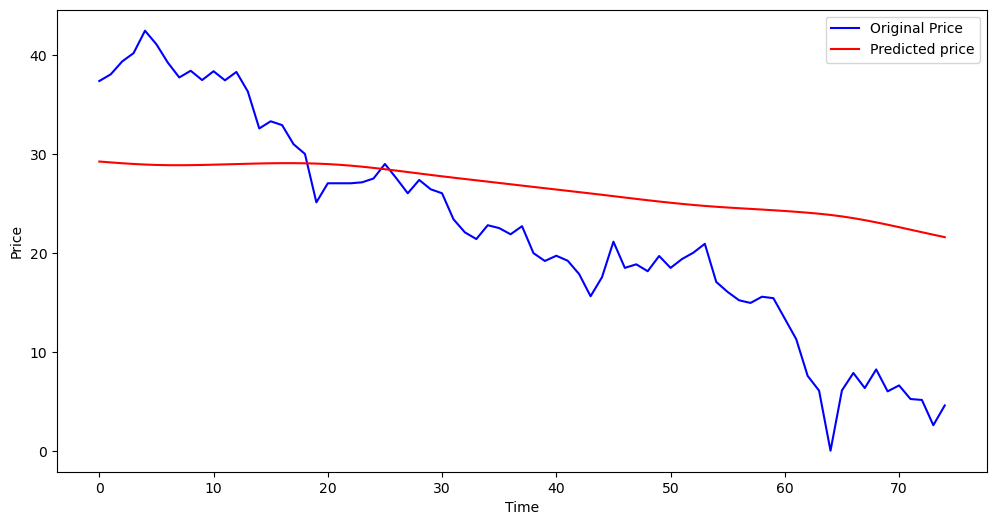

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
